In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)

pd.set_option("display.max_rows", 200)

import statsmodels.stats.api as sms
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (
    RandomForestRegressor,
    AdaBoostRegressor,
    GradientBoostingRegressor,
    StackingRegressor,
)

from sklearn.neural_network import MLPRegressor
from xgboost import XGBRegressor

import warnings

warnings.filterwarnings("ignore")

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [5]:
df = pd.read_csv("phones_data.csv")
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")

np.random.seed(1)
df.sample(n =10)

There are 1224 rows and 13 columns.


,Unnamed: 0,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date
685,685,Motorola,One Vision 4/128GB Bronze,Android,382,7590.0,NaN,NaN,1,6.30,128.0,3500.0,6-2019
793,793,Xiaomi,Redmi 9 4/128GB Blue (no NFC),Android,367,4960.0,4690.0,5588.0,8,6.53,128.0,5020.0,10-2020
159,159,OPPO,A5 2020 3/64GB Black,Android,833,4773.0,4499.0,4999.0,4,6.50,64.0,5000.0,11-2019
1210,1210,Apple,iPhone XR 64GB Black (MRY42),iOS,1218,16938.0,12049.0,19870.0,125,6.10,64.0,2942.0,9-2018
341,341,ERGO,F248 Defender Dual SIM Black,NaN,45,649.0,NaN,NaN,1,2.40,NaN,2000.0,10-2019
720,720,Google,Pixel 128GB (Quite Black),Android,520,6838.0,5199.0,9700.0,4,5.00,128.0,2770.0,10-2016
126,126,Honor,8x Max 4/64GB Black,Android,697,5652.0,5605.0,5699.0,2,7.12,64.0,5000.0,10-2018
575,575,AGM,M3 Black,NaN,387,1484.0,1189.0,1881.0,4,2.40,NaN,1970.0,12-2019
239,239,Blackview,BV9500 Pro 6/128GB Black,Android,612,8087.0,7398.0,11924.0,7,5.70,128.0,10000.0,10-2018
268,268,ZTE,Blade A5 2020 2/32GB Black,Android,942,2517.0,2299.0,2881.0,44,6.08,32.0,3200.0,12-2019


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1224 entries, 0 to 1223
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      1224 non-null   int64  
 1   brand_name      1224 non-null   object 
 2   model_name      1224 non-null   object 
 3   os              1027 non-null   object 
 4   popularity      1224 non-null   int64  
 5   best_price      1224 non-null   float64
 6   lowest_price    964 non-null    float64
 7   highest_price   964 non-null    float64
 8   sellers_amount  1224 non-null   int64  
 9   screen_size     1222 non-null   float64
 10  memory_size     1112 non-null   float64
 11  battery_size    1214 non-null   float64
 12  release_date    1224 non-null   object 
dtypes: float64(6), int64(3), object(4)
memory usage: 124.4+ KB


In [7]:
df.describe()

,Unnamed: 0,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size
count,1224.000000,1224.000000,1224.000000,964.000000,964.000000,1224.000000,1222.000000,1112.000000,1214.000000
mean,611.500000,612.500000,7941.206699,7716.018672,9883.410788,16.743464,5.394378,95.700059,3608.201812
std,353.482673,353.482673,8891.836260,8560.959059,11514.936818,20.597006,1.476991,111.922576,1668.268774
min,0.000000,1.000000,214.000000,198.000000,229.000000,1.000000,1.400000,0.003200,460.000000
25%,305.750000,306.750000,2599.750000,2399.000000,2887.000000,2.000000,5.162500,32.000000,2900.000000
50%,611.500000,612.500000,4728.000000,4574.000000,5325.500000,8.000000,6.000000,64.000000,3687.000000
75%,917.250000,918.250000,9323.000000,9262.250000,12673.750000,26.000000,6.400000,128.000000,4400.000000
max,1223.000000,1224.000000,56082.000000,49999.000000,69999.000000,125.000000,8.100000,1000.000000,18800.000000


In [9]:
df.describe(include = "object")

,brand_name,model_name,os,release_date
count,1224,1224,1027,1224
unique,64,1068,6,73
top,Samsung,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,10-2020
freq,168,3,915,79


In [10]:
df.head()

,Unnamed: 0,brand_name,model_name,os,popularity,best_price,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date
0,0,ALCATEL,1 1/8GB Bluish Black (5033D-2JALUAA),Android,422,1690.0,1529.0,1819.0,36,5.00,8.0,2000.0,10-2020
1,1,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,323,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020
2,2,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,299,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020
3,3,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,287,1803.0,1659.0,2489.0,36,5.00,16.0,2000.0,9-2020
4,4,Nokia,1.3 1/16GB Charcoal,Android,1047,1999.0,NaN,NaN,10,5.71,16.0,3000.0,4-2020


In [11]:
for column in df.columns:
  if df[column].dtype == "object":
    print(column.upper(), " :",df[column].nunique())
    print(df[column].value_counts())
    print("\n")
    print("*" * 55)
    print("\n")

BRAND_NAME  : 64
Samsung         168
Xiaomi          111
Apple           102
Motorola         62
Sigma mobile     52
HUAWEI           49
Nokia            48
DOOGEE           44
Blackview        42
Honor            33
Ulefone          32
realme           30
Nomi             29
LG               26
Meizu            26
ZTE              24
Tecno            22
OPPO             21
Sony             20
Oukitel          20
Google           18
OnePlus          18
ERGO             18
vivo             17
ALCATEL          16
2E               14
Maxcom           12
Cubot            12
ASUS             11
Philips          11
Astro            10
AGM              10
Archos            9
Rezone            9
Lenovo            8
CAT               7
Vernee            5
UMIDIGI           5
Fly               5
S-TELL            5
Viaan             4
Assistant         3
Bravis            3
Bluboo            3
HTC               3
Elephone          3
Jinga             2
Coolpad           2
Smartex           2
Glo

In [13]:
df.nunique()

Unnamed: 0        1224
brand_name          64
model_name        1068
os                   6
popularity        1224
best_price         970
lowest_price       666
highest_price      648
sellers_amount      94
screen_size         82
memory_size         15
battery_size       151
release_date        73
dtype: int64

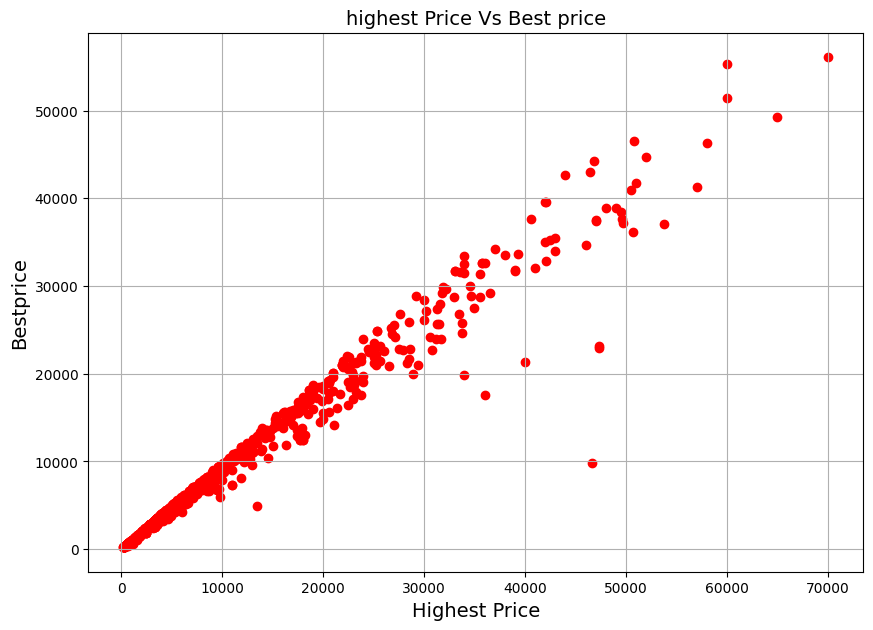

In [15]:
plt.figure(figsize = (10,7))
plt.scatter(df["highest_price"],df["best_price"],color="red")
plt.title("highest Price Vs Best price",fontsize = 14)
plt.xlabel("Highest Price",fontsize =14)
plt.ylabel("Bestprice",fontsize =14)
plt.grid(True)
plt.show()

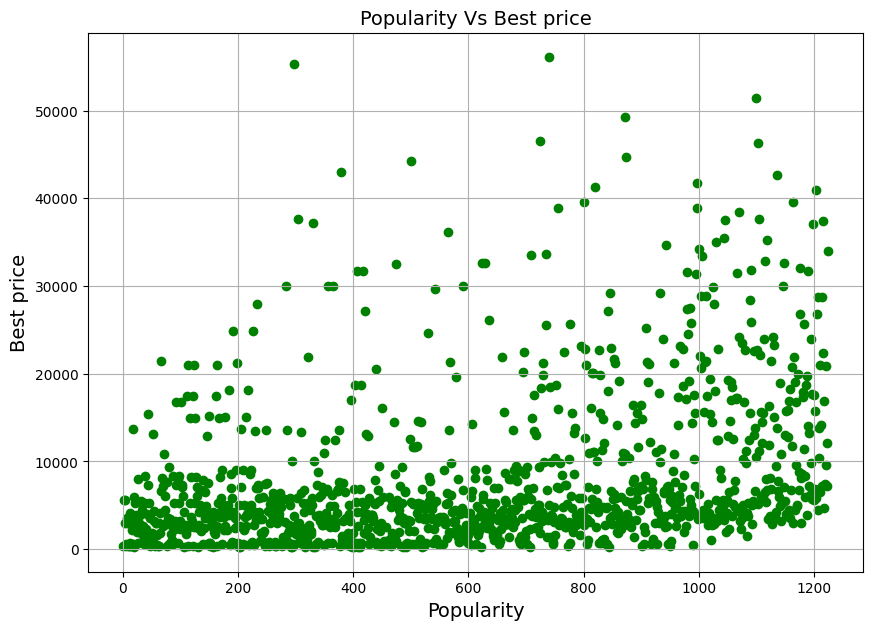

In [16]:
plt.figure(figsize = (10,7))
plt.scatter(df["popularity"],df["best_price"],color="green")
plt.title("Popularity Vs Best price",fontsize = 14)
plt.xlabel("Popularity",fontsize =14)
plt.ylabel("Best price",fontsize =14)
plt.grid(True)
plt.show()

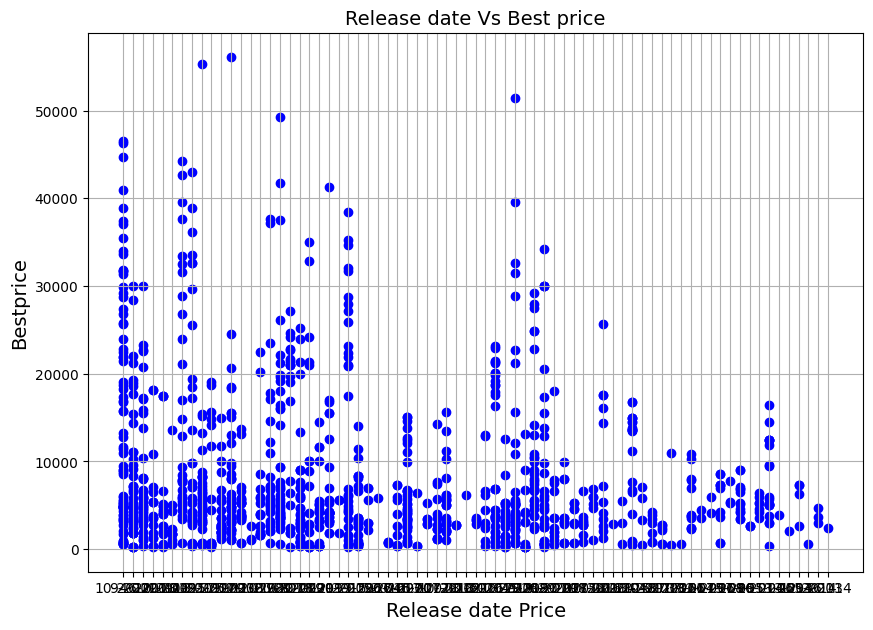

In [17]:
plt.figure(figsize = (10,7))
plt.scatter(df["release_date"],df["best_price"],color="blue")
plt.title("Release date Vs Best price",fontsize = 14)
plt.xlabel("Release date Price",fontsize =14)
plt.ylabel("Bestprice",fontsize =14)
plt.grid(True)
plt.show()

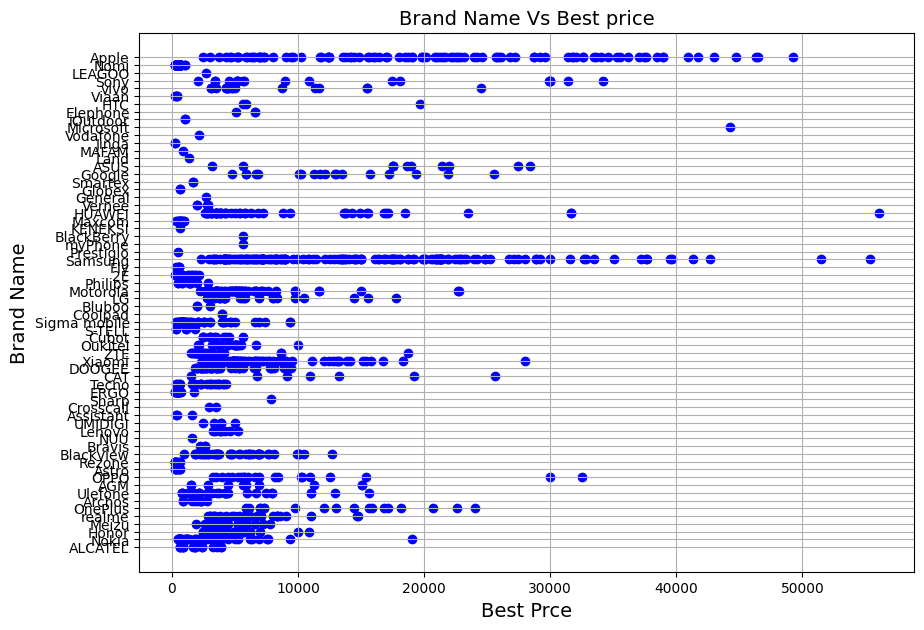

In [21]:
plt.figure(figsize = (10,7))
plt.scatter(df["best_price"],df["brand_name"],color="blue")
plt.title("Brand Name Vs Best price",fontsize = 14)
plt.xlabel("Best Prce",fontsize =14)
plt.ylabel("Brand Name",fontsize =14)
plt.grid(True)
plt.show()

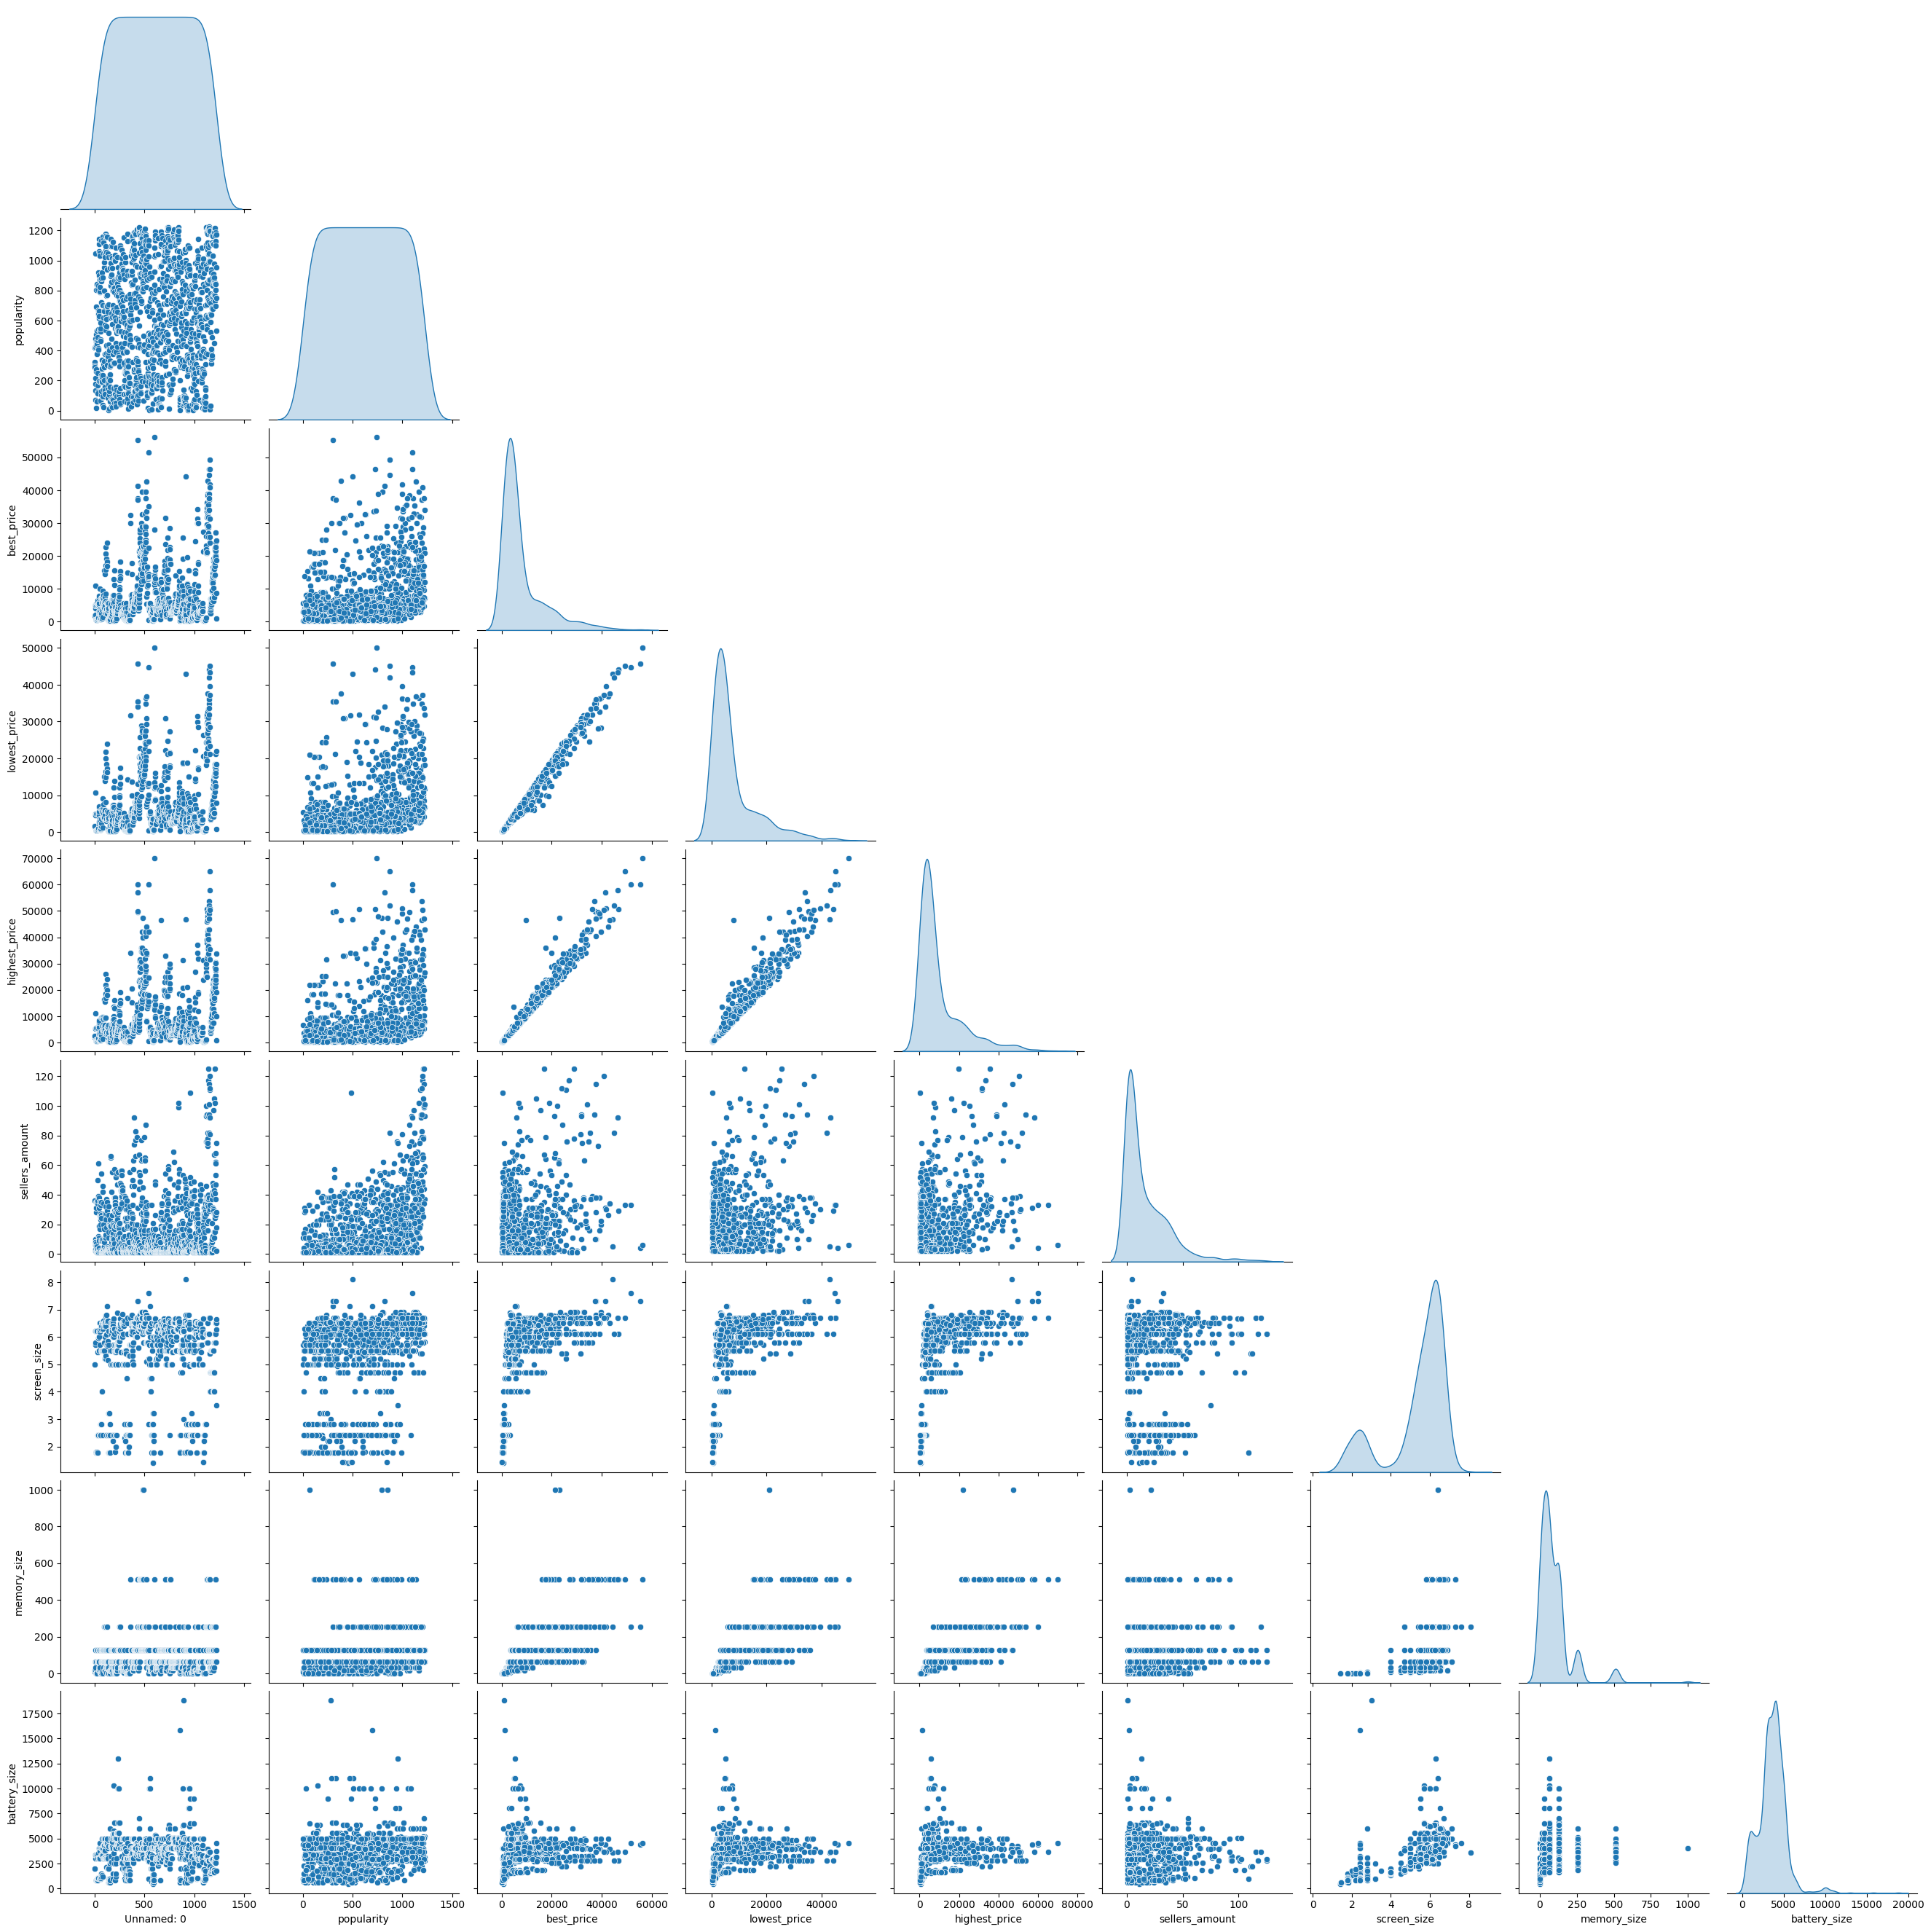

In [22]:
sns.pairplot(df,height = 3 ,diag_kind = "kde",corner = True)

<Axes: xlabel='best_price', ylabel='brand_name'>

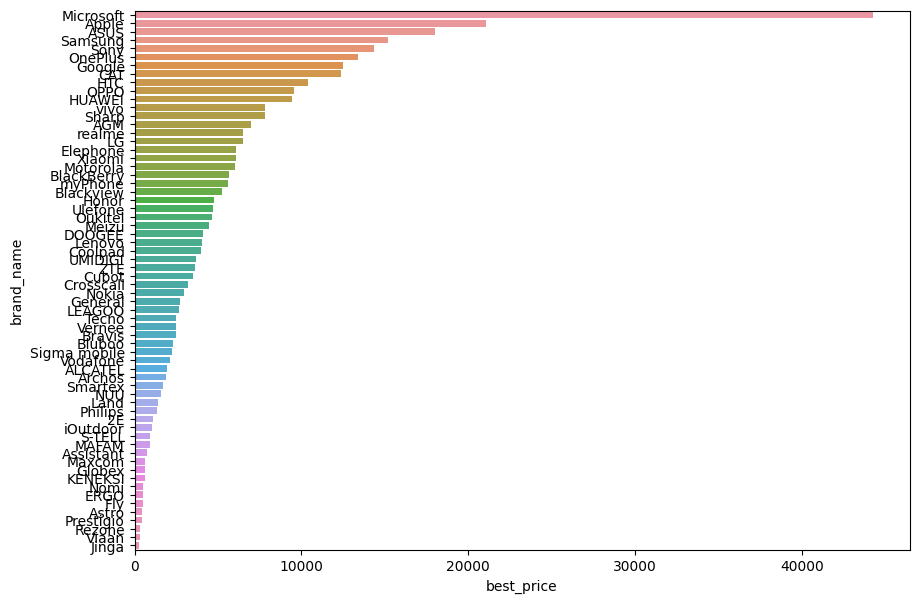

In [24]:
plt.figure(figsize=(10,7))
sns.barplot(
    y = df["brand_name"],
    x = df["best_price"],
    ci = False,
    order = df.groupby("brand_name")
    .mean()["best_price"]
    .sort_values(ascending=False)
    .index,    
)

<Axes: xlabel='best_price', ylabel='os'>

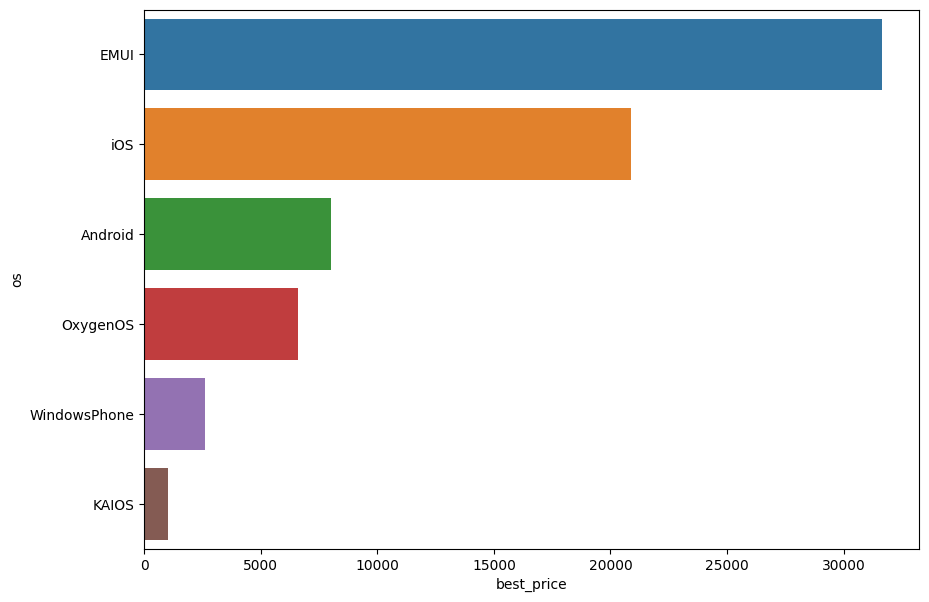

In [25]:
plt.figure(figsize=(10,7))
sns.barplot(
    y = df["os"],
    x = df["best_price"],
    ci = False,
    order = df.groupby("os")
    .mean()["best_price"]
    .sort_values(ascending=False)
    .index,    
)

<Axes: xlabel='brand_name'>

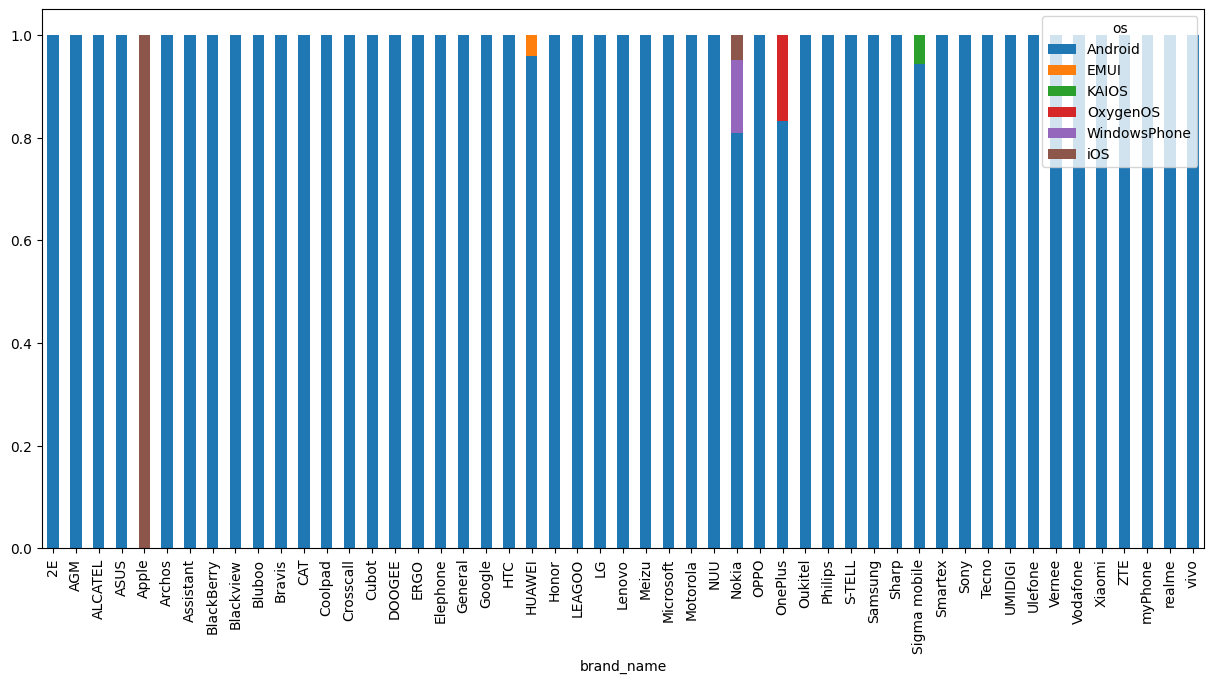

In [26]:
pd.crosstab(df["brand_name"], df["os"], normalize = "index").plot(
    kind = "bar",stacked=True, figsize=(15,7)
)

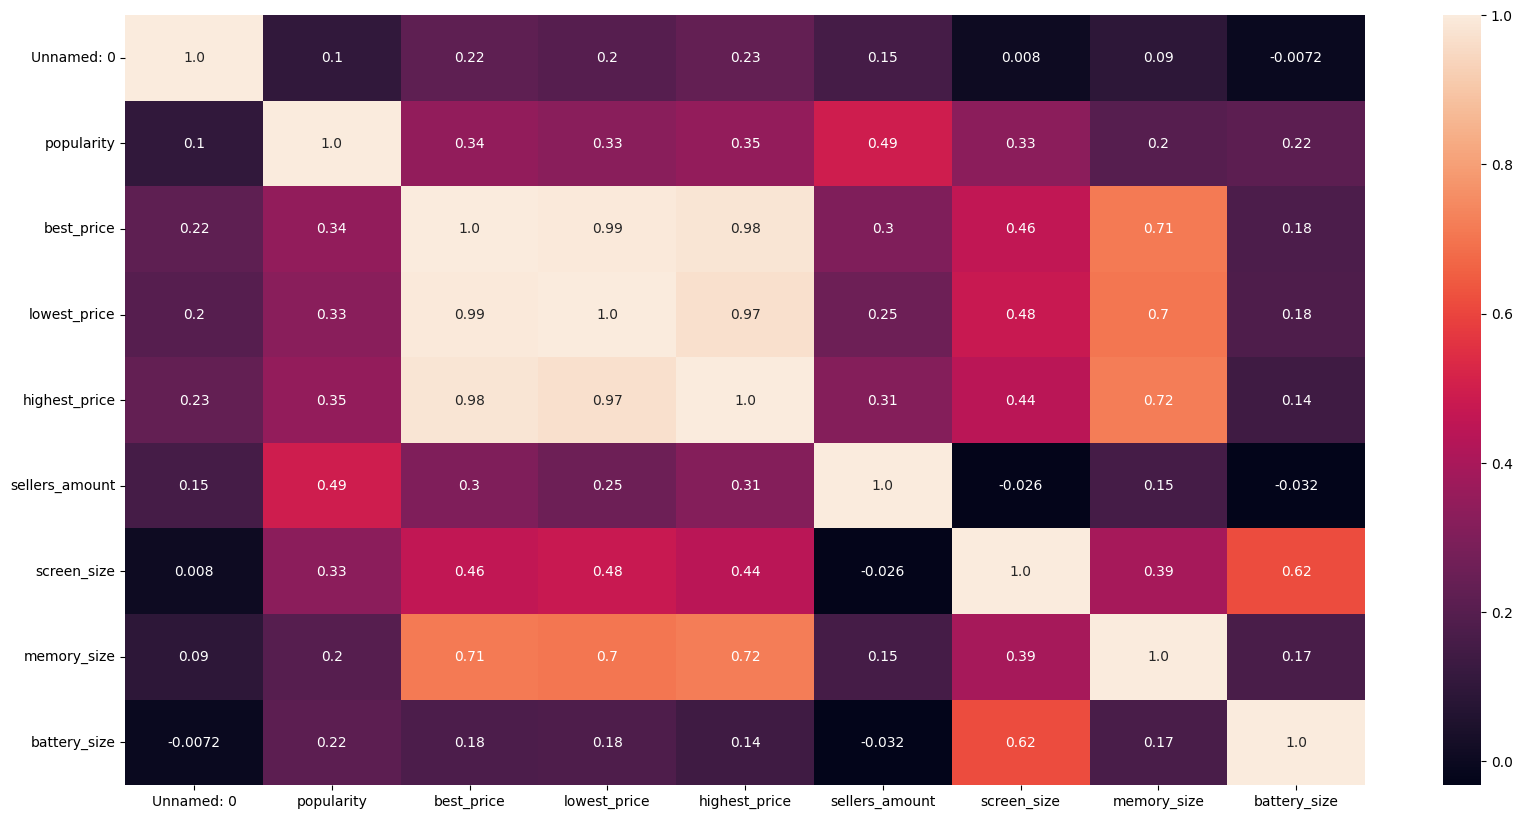

In [27]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot = True, fmt = ".2")
plt.show()

In [28]:
df.isnull().sum()

Unnamed: 0          0
brand_name          0
model_name          0
os                197
popularity          0
best_price          0
lowest_price      260
highest_price     260
sellers_amount      0
screen_size         2
memory_size       112
battery_size       10
release_date        0
dtype: int64

**Taking missing value and replacing it with the overall median of a brand because brand does'nt have any null value**

In [29]:
(df.isnull().sum() / df.shape[0] * 100)[df.isnull().sum()>0]

os               16.094771
lowest_price     21.241830
highest_price    21.241830
screen_size       0.163399
memory_size       9.150327
battery_size      0.816993
dtype: float64

In [30]:
df.groupby(["brand_name"], as_index = False)["highest_price"].median()

,brand_name,highest_price
0,2E,1213.5
1,AGM,5400.5
2,ALCATEL,2154.0
3,ASUS,22400.0
4,Apple,24999.0
5,Archos,2499.0
6,Assistant,494.5
7,Astro,799.0
8,BlackBerry,5849.0
9,Blackview,5472.0


In [32]:
df["highest_price"] = df.groupby(["brand_name"])["highest_price"].transform(
    lambda x: x.fillna(x.median())
)

In [33]:
df.isnull().sum()

Unnamed: 0          0
brand_name          0
model_name          0
os                197
popularity          0
best_price          0
lowest_price      260
highest_price      18
sellers_amount      0
screen_size         2
memory_size       112
battery_size       10
release_date        0
dtype: int64

In [34]:
df.groupby(["brand_name"], as_index = False)["lowest_price"].median()

,brand_name,lowest_price
0,2E,967.5
1,AGM,4798.0
2,ALCATEL,1594.0
3,ASUS,20650.0
4,Apple,16862.0
5,Archos,2060.5
6,Assistant,304.0
7,Astro,532.0
8,BlackBerry,5499.0
9,Blackview,4640.0


In [35]:
df["lowest_price"] = df.groupby(["brand_name"])["lowest_price"].transform(
    lambda x: x.fillna(x.median())
)

In [36]:
df.isnull().sum()

Unnamed: 0          0
brand_name          0
model_name          0
os                197
popularity          0
best_price          0
lowest_price       18
highest_price      18
sellers_amount      0
screen_size         2
memory_size       112
battery_size       10
release_date        0
dtype: int64

In [41]:
df.groupby(["brand_name"], as_index = False)["memory_size"].median()

,brand_name,memory_size
0,2E,4.016
1,AGM,64.000
2,ALCATEL,16.000
3,ASUS,256.000
4,Apple,128.000
5,Archos,16.000
6,Assistant,0.064
7,Astro,0.032
8,BlackBerry,32.000
9,Blackview,64.000


In [42]:
df["memory_size"] = df.groupby(["brand_name"])["memory_size"].transform(
    lambda x: x.fillna(x.median())
)

In [43]:
df.isnull().sum()

Unnamed: 0          0
brand_name          0
model_name          0
os                197
popularity          0
best_price          0
lowest_price       18
highest_price      18
sellers_amount      0
screen_size         2
memory_size        12
battery_size       10
release_date        0
dtype: int64

In [44]:
df.columns

Index(['Unnamed: 0', 'brand_name', 'model_name', 'os', 'popularity',
       'best_price', 'lowest_price', 'highest_price', 'sellers_amount',
       'screen_size', 'memory_size', 'battery_size', 'release_date'],
      dtype='object')

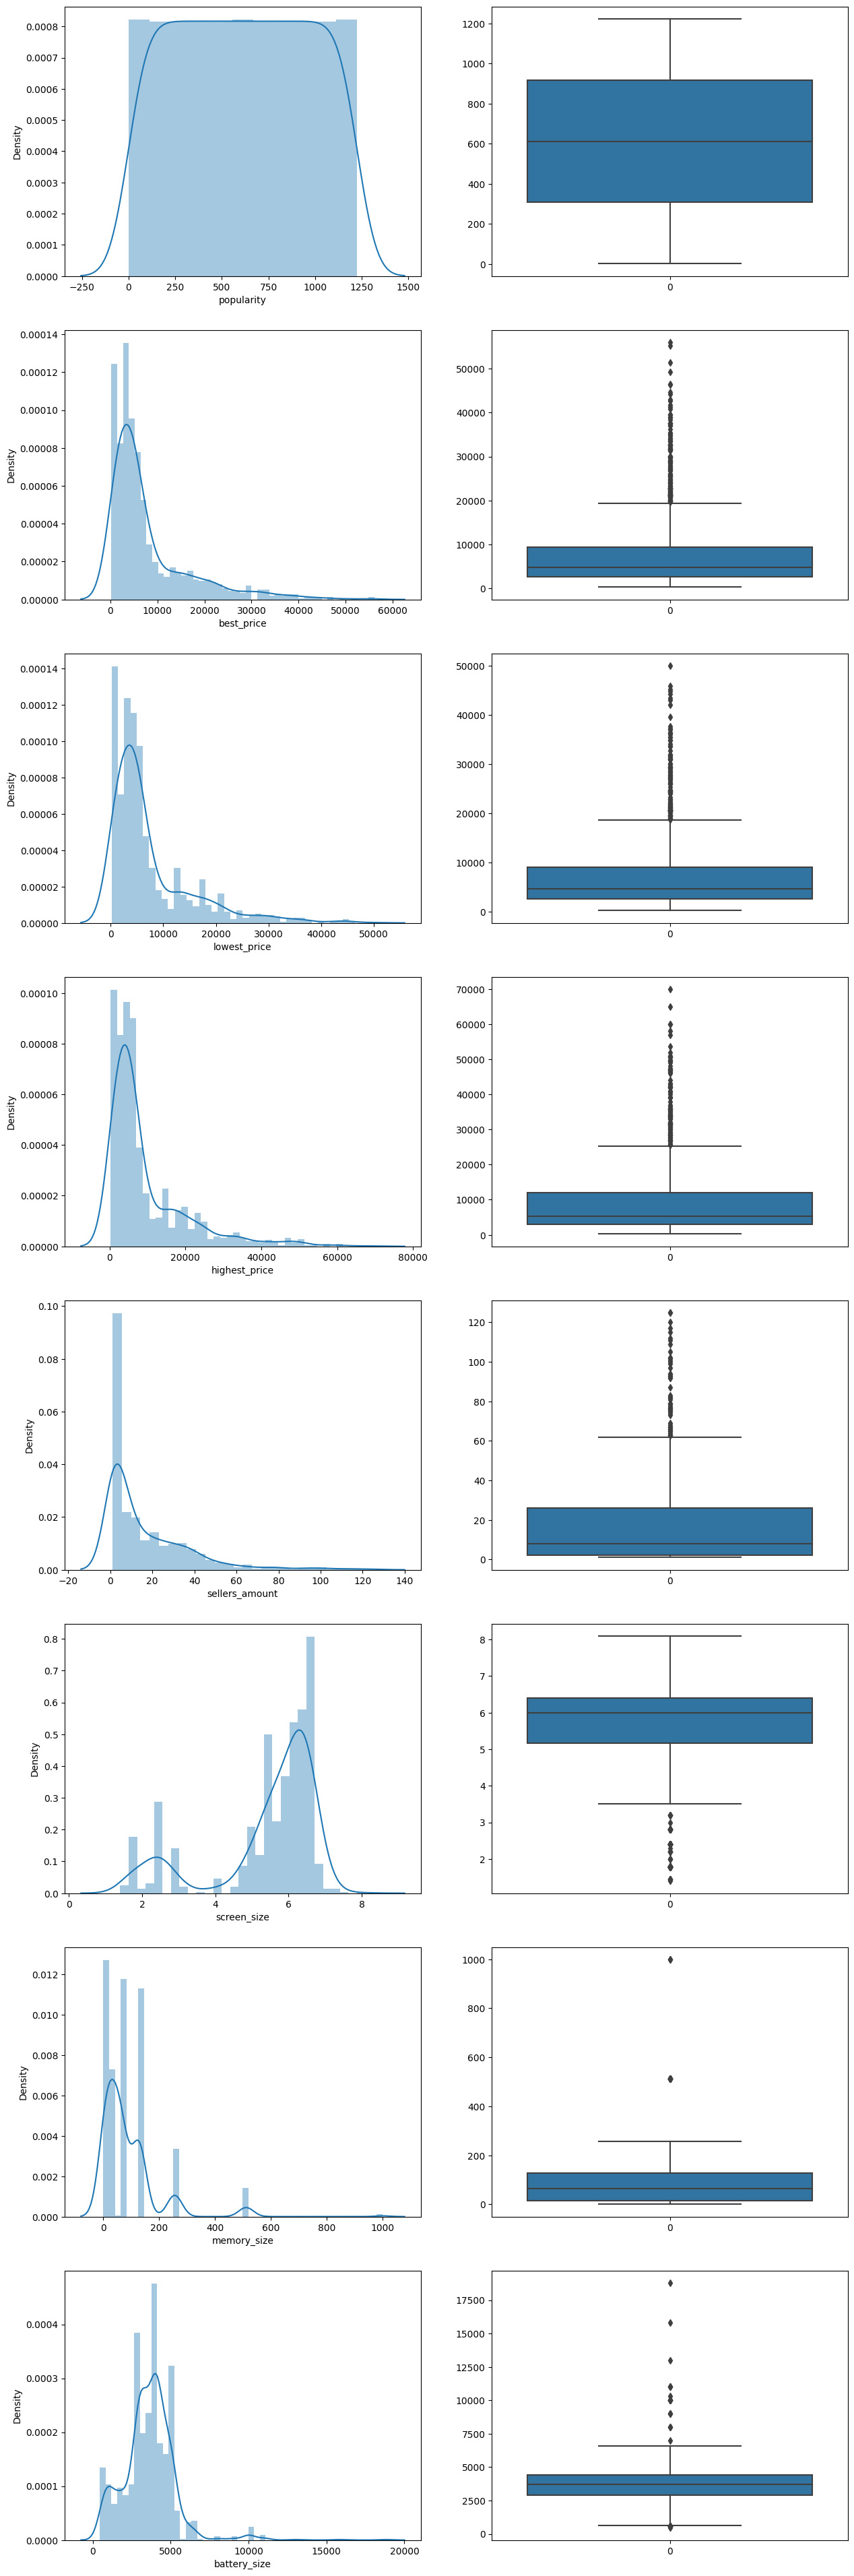

In [45]:
a = 1
plt.figure(figsize = (15,80))
for i in df[
    [
          'brand_name', 
          'model_name', 
          'os', 
          'popularity',
          'best_price',
          'lowest_price',
          'highest_price',
          'sellers_amount',
          'screen_size', 
          'memory_size', 
          'battery_size',
          'release_date',
    ]
]:
    if df[i].dtype != "object":
      plt.subplot(13,2,a)
      sns.distplot(df[i])
      plt.subplot(13,2,a + 1)
      sns.boxplot(df[i])
      a += 2

In [47]:
def remove_outlier(col):
  sorted(col)
  q1, q3 = np.quantile(col, [0.25,0.75])
  iqr = q3 - q1
  ll = q1 - 1.5 * iqr
  ul = q3 + 1.5 * iqr
  return ll,ul

In [48]:
for i in df[
    [
          'brand_name', 
          'model_name', 
          'os', 
          'popularity',
          'best_price',
          'lowest_price',
          'highest_price',
          'sellers_amount',
          'screen_size', 
          'memory_size', 
          'battery_size',
          'release_date',
    ]
]:
    if df[i].dtype != "object":
      ll, ul = remove_outlier(df[i])
      df[i] = np.where(df[i] > ul , ul, df[i])
      df[i] = np.where(df[i] < ll, ll, df[i])

In [55]:
X = df.drop("best_price",axis=1)
y = df[["best_price"]]

X.head()

,Unnamed: 0,brand_name,model_name,os,popularity,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date
0,0,ALCATEL,1 1/8GB Bluish Black (5033D-2JALUAA),Android,422.0,1529.0,1819.0,36.0,5.00,8.0,2000.0,10-2020
1,1,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,323.0,1659.0,2489.0,36.0,5.00,16.0,2000.0,9-2020
2,2,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,299.0,1659.0,2489.0,36.0,5.00,16.0,2000.0,9-2020
3,3,ALCATEL,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),Android,287.0,1659.0,2489.0,36.0,5.00,16.0,2000.0,9-2020
4,4,Nokia,1.3 1/16GB Charcoal,Android,1047.0,1175.0,1547.5,10.0,5.71,16.0,3000.0,4-2020


In [57]:
X = pd.get_dummies(X, columns=["brand_name","os"],drop_first = True)
X.head()

,Unnamed: 0,model_name,popularity,lowest_price,highest_price,sellers_amount,screen_size,memory_size,battery_size,release_date,brand_name_AGM,brand_name_ALCATEL,brand_name_ASUS,brand_name_Apple,brand_name_Archos,brand_name_Assistant,brand_name_Astro,brand_name_BlackBerry,brand_name_Blackview,brand_name_Bluboo,brand_name_Bravis,brand_name_CAT,brand_name_Coolpad,brand_name_Crosscall,brand_name_Cubot,brand_name_DOOGEE,brand_name_ERGO,brand_name_Elephone,brand_name_Fly,brand_name_General,brand_name_Globex,brand_name_Google,brand_name_HTC,brand_name_HUAWEI,brand_name_Honor,brand_name_Jinga,brand_name_KENEKSI,brand_name_LEAGOO,brand_name_LG,brand_name_Land,brand_name_Lenovo,brand_name_MAFAM,brand_name_Maxcom,brand_name_Meizu,brand_name_Microsoft,brand_name_Motorola,brand_name_NUU,brand_name_Nokia,brand_name_Nomi,brand_name_OPPO,brand_name_OnePlus,brand_name_Oukitel,brand_name_Philips,brand_name_Prestigio,brand_name_Rezone,brand_name_S-TELL,brand_name_Samsung,brand_name_Sharp,brand_name_Sigma mobile,brand_name_Smartex,brand_name_Sony,brand_name_Tecno,brand_name_UMIDIGI,brand_name_Ulefone,brand_name_Vernee,brand_name_Viaan,brand_name_Vodafone,brand_name_Xiaomi,brand_name_ZTE,brand_name_iOutdoor,brand_name_myPhone,brand_name_realme,brand_name_vivo,os_EMUI,os_KAIOS,os_OxygenOS,os_WindowsPhone,os_iOS
0,0,1 1/8GB Bluish Black (5033D-2JALUAA),422.0,1529.0,1819.0,36.0,5.00,8.0,2000.0,10-2020,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),323.0,1659.0,2489.0,36.0,5.00,16.0,2000.0,9-2020,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),299.0,1659.0,2489.0,36.0,5.00,16.0,2000.0,9-2020,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,3,1 5033D 1/16GB Volcano Black (5033D-2LALUAF),287.0,1659.0,2489.0,36.0,5.00,16.0,2000.0,9-2020,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,1.3 1/16GB Charcoal,1047.0,1175.0,1547.5,10.0,5.71,16.0,3000.0,4-2020,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [58]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state =42
)

In [60]:
linearregression = LinearRegression()
linearregression.fit(X_train, y_train)

ValueError: ignored

In [ ]:
for idx , col_name in enumerate